# Analysis functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import re
import pandas as pd
from scipy.optimize import leastsq
from scipy.integrate import odeint
import math

def timeToSec(time):
    pc = re.split(':',time)
    return int(pc[0])*3600 + int(pc[1])*60 + int(pc[2])

def lookupCondition(columnHeader, conds):
    keys = conds.keys()
    count = 0
    out = ""
    for e in conds.values():
        if columnHeader in e:
            count += 1
            out = list(conds.keys())[list(conds.values()).index(e)]
    assert(count <= 1)
    return out

def slc(list, indices):
  returnArray = []
  for i in indices:
    returnArray += [list[i]]
  return  returnArray

# Rate constant for R1 Nat

/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/1114315076.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1 = [i[0] for i in odeint(translatorModel, y0, t, args=(float(krep), kf1, kf2, kr1,kr2,kf,kr, scale), rtol = 1e-12, atol = 1e-12)]


Fitted krep: 413378.5 +/- 2579.47


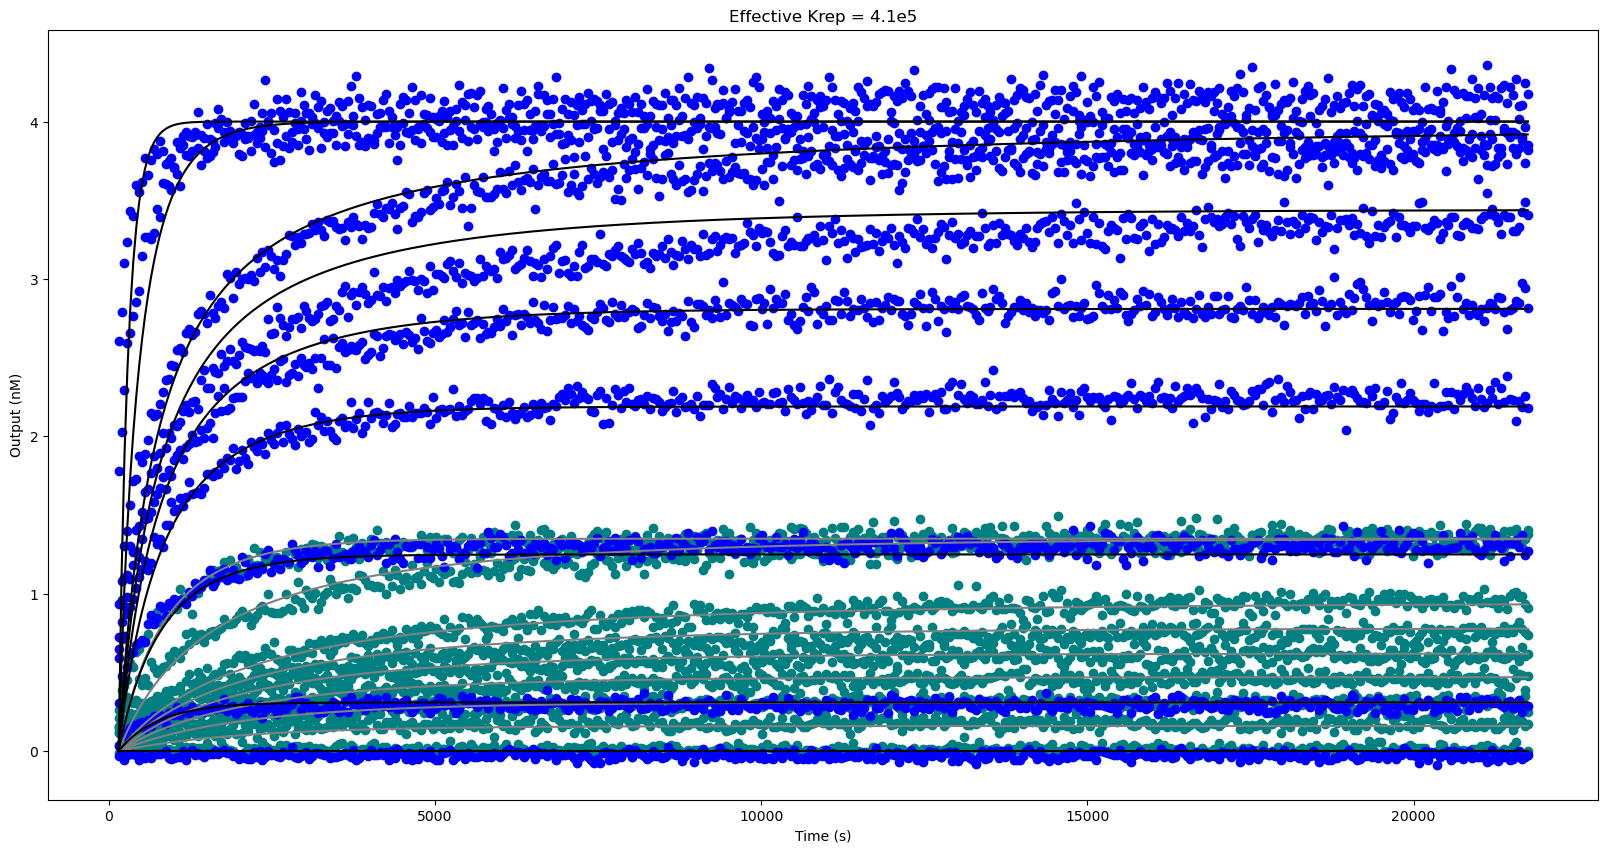

In [2]:
data = pd.read_csv("UW_RepNat_Kinetics.csv")

RT = 0.593

# The below fits are to calibration curves for the two different reporter concentrations used in the experiment
fit0 = [126.85, 464.25]#intercept, slope
fit1 = [172.85, 489.88]
x = [timeToSec(i) for i in list(data['Time'].values)] #converted to hours
start = timeToSec("0:00:00")
offset = 150 #Time between tranfering protocol and first read (in seconds)




def getAverageCurve(startTime, offset, level, x, data, conditions, fit):
    yAll = np.zeros(len([i for i in x if float(i) >= startTime]))
    num = 0
    for i, c in enumerate(data.columns):
        col = c
        if i>= 2 and lookupCondition(col, conditions) == level:
            num += 1
            ynew = [(float(data[col].values[z]) - fit[0])/fit[1] for z in range(len(data[col].values)) if float(x[z]) >= startTime]
            for j in range(len(yAll)):
                yAll[j] += ynew[j]
    y = yAll/num
    x = [i + offset - startTime for i in x if i>=startTime]
    return (x, y)

conditions = {'R1_S2_50nM: 1.25 nM' : ['B2', 'C2', 'D2'],
'F2t_S2_5nM: 0.16 nM, R1_S2_50nM: 1.25 nM' : ['C3', 'D3'],
'F2t_S2_5nM: 0.31 nM, R1_S2_50nM: 1.25 nM' : ['B4', 'C4', 'D4'],
'F2t_S2_5nM: 0.47 nM, R1_S2_50nM: 1.25 nM' : ['B5', 'C5', 'D5'],
'F2t_S2_5nM: 0.62 nM, R1_S2_50nM: 1.25 nM' : ['B6', 'C6', 'D6'],
'F2t_S2_5nM: 0.78 nM, R1_S2_50nM: 1.25 nM' : ['B7', 'C7', 'D7'],
'F2t_S2_5nM: 0.94 nM, R1_S2_50nM: 1.25 nM' : ['B8', 'C8', 'D8'],
#'F2t_S2_5nM: 1.25 nM, R1_S2_50nM: 1.25 nM' : ['B9', 'C9', 'D9'],#noted evaporation in kinetic curves
'F2t_S2_5nM: 1.87 nM, R1_S2_50nM: 1.25 nM' : ['B10', 'C10', 'D10'],
'F2t_S2_5nM: 3.75 nM, R1_S2_50nM: 1.25 nM' : ['B11', 'C11', 'D11'],
'R1_S2_50nM: 3.75 nM' : ['E2', 'F2', 'G2'],
'F2t_S2_50nM2: 0.31 nM, R1_S2_50nM: 3.75 nM' : ['E3', 'F3', 'G3'],
'F2t_S2_50nM2: 1.25 nM, R1_S2_50nM: 3.75 nM' : ['E4', 'F4', 'G4'],
'F2t_S2_50nM2: 2.19 nM, R1_S2_50nM: 3.75 nM' : ['E5', 'F5', 'G5'],
'F2t_S2_50nM2: 2.81 nM, R1_S2_50nM: 3.75 nM' : ['E6', 'F6', 'G6'],
'F2t_S2_50nM2: 3.44 nM, R1_S2_50nM: 3.75 nM' : ['E7', 'F7', 'G7'],
'F2t_S2_50nM2: 4.06 nM, R1_S2_50nM: 3.75 nM' : ['E8', 'F8', 'G8'],
#'F2t_S2_50nM2: 5.62 nM, R1_S2_50nM: 3.75 nM' : ['E9', 'F9', 'G9'],#noted evaporation in kinetic curves
'F2t_S2_50nM2: 8.75 nM, R1_S2_50nM: 3.75 nM' : ['E10', 'F10', 'G10'],
'F2t_S2_50nM2: 18.12 nM, R1_S2_50nM: 3.75 nM' : ['E11', 'F11', 'G11']
                           }

levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
for i,l in enumerate(levels):
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)
    if i < 9:
      curves += [getAverageCurve(start, offset, l, x, data, conditions, fit0)]
    else:
      curves += [getAverageCurve(start, offset, l, x, data, conditions, fit1)]



to_fit = [c[1]*1e-9 for c in curves]
x_trunc = curves[0][0]



def modelCascade(krep,  tArray, fixed_params):

    """
    Function that represents the model to be fit.

    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
    """

    t = tArray
    # Unpack the input parameters
    y0, kf1, kf2, kr1, kr2, kf, kr, scale = fixed_params['y0'],fixed_params['kf1'], fixed_params['kf2'], fixed_params['kr1'],fixed_params['kr2'], fixed_params['kf'], fixed_params['kr'],  fixed_params['scale']

    y0 = [i*1e-9 for i in y0]
    scale = 1e-9*scale

    krep = krep

    def translatorModel(y, t, krep, kf1 ,kf2 ,kr1,kr2, kf, kr, scale):
        P, Y1,F1t, F0t, X1, F2, F1, F0, W0, W1, W2 = y
        # CRN:
        # X1 <krev-kf> Y1
        # (X1 + F0 <krev-kf> F0t + W0)
        # (F0t + F1 <krev-kf> F1t + W1)
        # (F1t + F2 <krev-kf> Y1 + W2)
        # Y1 + R1 -kr> P


        #Rate of reporting
        R1 = scale - P
        dPdt = krep*(R1)*(Y1)

        #Rate of change of input and output
        dX1dt = kr*F0t*W0 - kf*X1*F0
        dY1dt = kf2*F1t*F2 - kr2*Y1*W2 - dPdt

        #Rate of change of gate concentrations
        dF1tdt = kf1*F0t*F1 - kr1*F1t*W1 - kf2*F1t*F2 + kr2*Y1*W2
        dF0tdt = kf*X1*F0 - kr*F0t*W0 - kf1*F0t*F1 + kr1*F1t*W1
        dF0dt = -kf*X1*F0 + kr*F0t*W0
        dF1dt = -kf1*F0t*F1 + kr1*F1t*W1
        dF2dt = -kf2*F1t*F2 + kr2*Y1*W2

        #Rate of change of waste concentrations
        dW0dt =  kf*X1*F0 - kr*W0*F0t
        dW1dt = kf1*F0t*F1 - kr1*W1*F1t
        dW2dt = kf2*F1t*F2 - kr2*W2*Y1

        return (dPdt, dY1dt, dF1tdt, dF0tdt, dX1dt, dF2dt, dF1dt, dF0dt, dW0dt, dW1dt, dW2dt)

    #Solve transalot model based on initial conditions and fitr

    y1 = [i[0] for i in odeint(translatorModel, y0, t, args=(float(krep), kf1, kf2, kr1,kr2,kf,kr, scale), rtol = 1e-12, atol = 1e-12)]

    if krep < 0:
      y1 = [np.inf for _ in range(len(y1))]

    return y1




def residuals(init, t, yList, fixed_params_list):
    # Loop through each set of y values and fixed parameters and calculate the residuals
    total_residuals = []
    krep = init

    n=0
    for y, fixed_params in zip(yList, fixed_params_list):
        model_y = modelCascade(krep,  t, fixed_params)
        total_residuals.append(y - model_y)
        n += 1

    # Concatenate all the residuals into one array
    return np.concatenate(total_residuals)

def fit_modelCascade(tArray, yList, initial_k, fixed_params_list):
    """
    Function to perform fitting for multiple cascades.

    Parameters:
    - tArray: Array of 'x' values (time values) for the cascades.
    - yList: List of 'y' values for each cascade.
    - initial_k_rep: Initial guess for the reporterRate.
    - fixed_params_list: A list of dictionaries, each containing all other parameters which are kept constant for a particular cascade.

    Returns:
    - k_rep: Fitted reporterRate.
    """
    # Fit the model to the data
    pfit, pcov, infodict, errmsg, success = leastsq(residuals, initial_k, args=(tArray, yList, fixed_params_list), full_output=1, epsfcn=0.0001)

    if pcov is not None:
        s_sq = sum(residuals(pfit, tArray, yList, fixed_params_list)**2)/(sum([len(i) for i in yList])- len(pfit))
        pcov = pcov * s_sq
    else:
        pcov = np.inf

    error = []
    for i in range(len(pfit)):
        try:
          error.append(np.absolute(pcov[i][i])**0.5)
        except:
          error.append( 0.00 )
    pfit_leastsq = pfit
    perr_leastsq = np.array(error)

    return pfit_leastsq, perr_leastsq



# Define the 'x' values and 'y' values
tArray = np.linspace(0, 10, 100)
yMatrix = np.random.normal(size=(3, len(tArray)))  # three sets of data

"""
    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
"""



# Initial parameters
y_init0 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.16,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.31,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.47,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init4 = [
    0.0,  # Initial concentration of P   (0)
    0.62,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init5 = [
    0.0,  # Initial concentration of P   (0)
    0.78,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init6 = [
    0.0,  # Initial concentration of P   (0)
    0.94,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init7 = [
    0.0,  # Initial concentration of P   (0)
    1.87,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init8 = [
    0.0,  # Initial concentration of P   (0)
    3.75,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]


#########

y_init9 = [
    0.0,  # Initial concentration of P   (0)
    0.0,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init10 = [
    0.0,  # Initial concentration of P   (0)
    0.31,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init11 = [
    0.0,  # Initial concentration of P   (0)
    1.25,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init12 = [
    0.0,  # Initial concentration of P   (0)
    2.19,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init13 = [
    0.0,  # Initial concentration of P   (0)
    2.81,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0
       # Initial concentration of W2. (10)
]

y_init14 = [
    0.0,  # Initial concentration of P   (0)
    3.44,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init15 = [
    0.0,  # Initial concentration of P   (0)
    4.06,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]


y_init16 = [
    0.0,  # Initial concentration of P   (0)
    8.75,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init17 = [
    0.0,  # Initial concentration of P   (0)
    18.12,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

cLow = 1.35
cHigh = 4.0


fixed_params_list = [
    {'y0': y_init0, 'kf1' : 0,'kf2' : 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0, 'scale':cLow},
    {'y0': y_init1, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,  'scale':cLow},
    {'y0': y_init2, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,'scale':cLow},
    {'y0': y_init3, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,'scale':cLow},
    {'y0': y_init4, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,'scale':cLow},
    {'y0': y_init5, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,'scale':cLow},
    {'y0': y_init6, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,'scale':cLow},
    {'y0': y_init7, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,'scale':cLow},
    {'y0': y_init8, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,'scale':cLow},


    {'y0': y_init9, 'kf1' : 0,'kf2' : 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0, 'scale':cHigh},
    {'y0': y_init10, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,  'scale':cHigh},
    {'y0': y_init11, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,'scale':cHigh},
    {'y0': y_init12, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,'scale':cHigh},
    {'y0': y_init13, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,'scale':cHigh},
    {'y0': y_init14, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,'scale':cHigh},
    {'y0': y_init15, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,'scale':cHigh},
    {'y0': y_init16, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,'scale':cHigh},
    {'y0': y_init17, 'kf1' : 0,'kf2': 0, 'kr1' : 0,'kr2' : 0, 'kf':0,'kr':0,'scale':cHigh},


]
initial_k = float(4e5)

inits = [y_init0, y_init1, y_init2, y_init3, y_init4, y_init5, y_init6, y_init7, y_init8, y_init9, y_init10, y_init11, y_init12, y_init13, y_init14, y_init15,  y_init16, y_init17]



fitted, error = fit_modelCascade(x_trunc, [i for i in to_fit], initial_k, fixed_params_list)
fitted_krep= fitted[0]
print(f"Fitted krep: {(fitted_krep):.1f} +/- {error[0]:.2f}")

plt.figure(figsize=(20,10))

for i in range(len(inits)):
  if i < 9:
    plt.scatter(curves[0][0],curves[i][1], color = 'teal')
    plt.plot(curves[0][0],[i*1e9 for i in modelCascade(fitted_krep, curves[0][0], fixed_params_list[i])], color='gray')
  else:
    plt.scatter(curves[0][0],curves[i][1], color = 'blue')
    plt.plot(curves[0][0],[i*1e9 for i in modelCascade(fitted_krep, curves[0][0], fixed_params_list[i])], color='black')
plt.xlabel('Time (s)')
plt.ylabel('Output (nM)')
plt.title('Effective Krep = 4.1e5')
plt.show()




# Rate constant for R1nn

## No mm

Fitted kf: 1380218.325981831
Error:  28370.260579252794



/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/3970467968.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dPdt = float(krep*(R1)*(Y1))
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/3970467968.py:142: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dX1dt = float(kr*F0t*W0 - kf*X1*F0)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/3970467968.py:143: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dY1dt = float(

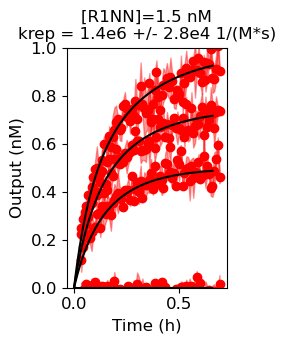

In [ ]:
data1 = pd.read_csv("UW_RepNN_NoMM_kinetics.csv")[0:80]
data1.to_csv
RT = 0.593
offset1 = 120
conditions = {'F2nnt_100nM: 0.0 nM, R1nn_100nM: 1.69 nM' : ['H2', 'I2', 'J2'],
'F2nnt_100nM: 0.5 nM, R1nn_100nM: 1.69 nM' : ['H3', 'I3', 'J3'],
'F2nnt_100nM: 0.75 nM, R1nn_100nM: 1.69 nM' : ['H4', 'I4', 'J4'],
'F2nnt_100nM: 1.0 nM, R1nn_100nM: 1.69 nM' : ['H5', 'I5', 'J5'],
#'F2nnt_100nM: 2.5 nM, R1nn_100nM: 1.69 nM' : ['H6', 'I6', 'J6']
              }


#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [timeToSec(i) for i in list(data1['Time'].values)]



fit1 = [73.66, 425.42]


start = timeToSec("0:00:00")





def getAverageCurve(startTime, offset, level, x, data, conditions, fit):
    """
    Calculate the average curve and standard deviation from data columns based on certain conditions.

    Args:
    - startTime (float): Start time to begin averaging from.
    - offset (float): Offset for the x values.
    - level: Condition level to filter the data columns.
    - x (list): x values for the curve.
    - data (DataFrame): Data containing the curve data in its columns.
    - conditions: Conditions corresponding to each data column.
    - fit (tuple): Tuple containing two fit values.

    Returns:
    - tuple: x values, average y values, and standard deviation of y values.
    """

    y_curves = []

    for i, c in enumerate(data.columns):
        if i >= 2 and lookupCondition(c, conditions) == level:
            ynew = [(float(data[c].values[z]) - fit[0]) / fit[1] for z in range(len(data[c].values)) if float(x[z]) >= startTime]
            y_curves.append(ynew)

    y_avg, y_std = average_and_std(y_curves)
    x_vals = [i + offset - startTime for i in x if i >= startTime]

    return x_vals, y_avg, y_std

def average_and_std(curves):
    curves_array = np.array(curves)
    mean_curve = np.mean(curves_array, axis=0)
    std_curve = np.std(curves_array, axis=0)
    return mean_curve.tolist(), std_curve.tolist()






levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for l in levels:
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)

    curves += [[getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[0],getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[1]]]
    stdDev += [getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[2]]


to_fit = [np.array(c[1])*1e-9 for c in curves]
x_trunc1 = curves[0][0]




from scipy.optimize import leastsq
from scipy.integrate import odeint
import numpy as np


def modelCascade(kf, tArray, fixed_params):

    """
    Function that represents the model to be fit.

    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
    """

    t = tArray
    # Unpack the input parameters
    y0, scale= fixed_params['y0'], fixed_params['scale']
    krep = kf
    y0 = [i*1e-9 for i in y0]
    scale = 1e-9*scale



    def translatorModel(y, t, krep, kf, scale):
        P, Y1,F1t, F0t, X1, F2, F1, F0, W0, W1, W2 = y
        # CRN:
        # X1 <krev-kf> Y1
        # (X1 + F0 <krev-kf> F0t + W0)
        # (F0t + F1 <krev-kf> F1t + W1)
        # (F1t + F2 <krev-kf> Y1 + W2)
        # Y1 + R1 -kr> P
        dG = [-1,-1,-1]
        kr = 0
        #Rate of reporting
        R1 = float(scale - P)
        dPdt = float(krep*(R1)*(Y1))

        #Rate of change of input and output
        dX1dt = float(kr*F0t*W0 - kf*X1*F0)
        dY1dt = float(kf*F1t*F2 - kr*Y1*W2 - dPdt)

        #Rate of change of gate concentrations
        dF1tdt = float(kf*F0t*F1 - kr*F1t*W1 - kf*F1t*F2 + kr*Y1*W2)
        dF0tdt = float(kf*X1*F0 - kr*F0t*W0 - kf*F0t*F1 + kr*F1t*W1)
        dF0dt = float(-kf*X1*F0 + kr*F0t*W0)
        dF1dt = float(-kf*F0t*F1 + kr*F1t*W1)
        dF2dt = float(-kf*F1t*F2 + kr*Y1*W2)

        #Rate of change of waste concentrations
        dW0dt =  float(kf*X1*F0 - kr*W0*F0t)
        dW1dt = float(kf*F0t*F1 - kr*W1*F1t)
        dW2dt = float(kf*F1t*F2 - kr*W2*Y1)

        return (dPdt, dY1dt, dF1tdt, dF0tdt, dX1dt, dF2dt, dF1dt, dF0dt, dW0dt, dW1dt, dW2dt)

    #Solve transalot model based on initial conditions and fit
    y1 = [i[0] for i in odeint(translatorModel, y0, t, args=(krep, kf, scale), rtol = 1e-12, atol = 1e-12)]
    kr = 0
    if kf < 0 or kr < 0:
      y1 = [-np.inf for _ in range(len(y1))]
    return y1




def residuals(kf, t, yList, fixed_params_list):
    # Loop through each set of y values and fixed parameters and calculate the residuals
    total_residuals = []
    n=0
    for y, fixed_params in zip(yList, fixed_params_list):
        tfull = np.arange(0, t[n][-1]+(t[n][-1]-t[n][-2]),t[n][-1]-t[n][-2])
        mindex = min([i for i in range(len(tfull)) if tfull[i]>= t[n][0]])
        model_y = modelCascade(kf, tfull, fixed_params)[mindex:] # I need to update this so that the model is calculaed starting from 0 then a fraction of it is fit
        total_residuals.append(y - model_y)
        n += 1

    # Concatenate all the residuals into one array
    return np.concatenate(total_residuals)

def fit_modelCascade(tArray, yList, initial_k, fixed_params_list):
    """
    Function to perform fitting for multiple cascades.

    Parameters:
    - tArray: Array of 'x' values (time values) for the cascades.
    - yList: List of 'y' values for each cascade.
    - initial_k_rep: Initial guess for the reporterRate.
    - fixed_params_list: A list of dictionaries, each containing all other parameters which are kept constant for a particular cascade.

    Returns:
    - k_rep: Fitted reporterRate.
    """
    # Fit the model to the data
    out, sucess = leastsq(residuals, initial_k, args=(tArray, yList, fixed_params_list))

    return out



import numpy as np

# Define the 'x' values and 'y' values
tArray = np.linspace(0, 10, 100)
yMatrix = np.random.normal(size=(3, len(tArray)))  # three sets of data

"""
    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
"""
scale = 1.5


# Initial parameters
y_init0 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.5,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.75,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    1.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]




fixed_params_list = [
    {'y0': y_init0, 'scale' : scale},
    {'y0': y_init1, 'scale' : scale},
    {'y0': y_init2, 'scale' : scale},
    {'y0': y_init3, 'scale' : scale}]


initial_k = 4e5

inits = [y_init0, y_init1, y_init2, y_init3]
x_list = [x_trunc1, x_trunc1, x_trunc1,x_trunc1,]
fits = []
for out in range(4):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_modelCascade(x, fitting, initial_k, fixed)
  fits += [res[0]]

fitted_kf = np.average(fits)
error = np.std(fits)



print("Fitted kf:", fitted_kf)
print('Error: ', error)

print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

x1v = [t/3600 for t in x1]
x_trunc1 = [t/3600 for t in x_trunc1]
for i in range(0,4):
    ax.plot(x1v,[i*1e9 for i in modelCascade(fitted_kf, x1, fixed_params_list[i])], color='black')
    ax.scatter(x_trunc1,curves[i][1], color = 'red')
    ax.fill_between(x_trunc1,(np.array(curves[i][1])-np.array(stdDev[i])),np.array(curves[i][1]),color = 'red', alpha = 0.4)
    ax.fill_between(x_trunc1,curves[i][1],  (np.array(curves[i][1])+np.array(stdDev[i])), color = 'red', alpha = 0.4)


ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,1.0)

ax.set_title(f"[R1NN]={scale} nM\nkrep = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-4,1)}e4 1/(M*s)", fontsize=12)

#plt.savefig('R1NN_akt.svg', dpi = 600, transparent=True)
plt.show()


## Mismatch rate constant

/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/2326587774.py:162: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1 = [i[0] for i in odeint(translatorModel, y0, t, args=(float(krep), kf, scale), rtol = 1e-12, atol = 1e-12)]
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/2326587774.py:144: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dX1dt = float(kr*F0t*W0 - kf*X1*F0)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/2326587774.py:145: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your

[25201.799957925617, 25256.93925973926, 25012.842946674016]
Fitted kf: 25157.19405477963
Error:  104.52437501882311



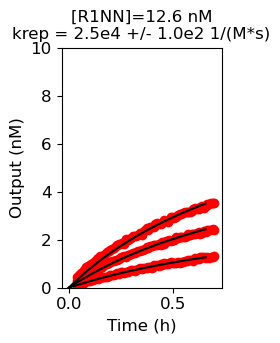

In [4]:
data1 = pd.read_csv("UW_RepNN_MM_Kinetics.csv")[0:80]

RT = 0.593



#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [timeToSec(i) for i in list(data1['Time'].values)]



fit1 = [358.71, 1443.5]



start = timeToSec("0:00:00")
offset1 = 150


conditions = {
'F2t_1uM: 2.5 nM, R1nn_1uM: 12.69 nM' : ['E13', 'F13', 'G13'],
'F2t_1uM: 5.0 nM, R1nn_1uM: 12.69 nM' : ['E14', 'F14', 'G14'],
'F2t_1uM: 7.5 nM, R1nn_1uM: 12.69 nM' : ['E15', 'F15', 'G15'],
}



def getAverageCurve(startTime, offset, level, x, data, conditions, fit):
    """
    Calculate the average curve and standard deviation from data columns based on certain conditions.

    Args:
    - startTime (float): Start time to begin averaging from.
    - offset (float): Offset for the x values.
    - level: Condition level to filter the data columns.
    - x (list): x values for the curve.
    - data (DataFrame): Data containing the curve data in its columns.
    - conditions: Conditions corresponding to each data column.
    - fit (tuple): Tuple containing two fit values.

    Returns:
    - tuple: x values, average y values, and standard deviation of y values.
    """

    y_curves = []

    for i, c in enumerate(data.columns):
        if i >= 2 and lookupCondition(c, conditions) == level:
            ynew = [(float(data[c].values[z]) - fit[0]) / fit[1] for z in range(len(data[c].values)) if float(x[z]) >= startTime]
            y_curves.append(ynew)

    y_avg, y_std = average_and_std(y_curves)
    x_vals = [i + offset - startTime for i in x if i >= startTime]

    return x_vals, y_avg, y_std

def average_and_std(curves):
    curves_array = np.array(curves)
    mean_curve = np.mean(curves_array, axis=0)
    std_curve = np.std(curves_array, axis=0)
    return mean_curve.tolist(), std_curve.tolist()






levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for l in levels:
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)

    curves += [[getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[0],getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[1]]]
    stdDev += [getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[2]]


to_fit = [np.array(c[1])*1e-9 for c in curves]
x_trunc1 = curves[0][0]




from scipy.optimize import leastsq
from scipy.integrate import odeint
import numpy as np



def modelCascade(kf, tArray, fixed_params):

    """
    Function that represents the model to be fit.

    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
    """

    t = tArray
    # Unpack the input parameters
    y0, scale= fixed_params['y0'], fixed_params['scale']
    krep = kf
    y0 = [i*1e-9 for i in y0]
    scale = 1e-9*scale



    def translatorModel(y, t, krep, kf, scale):
        P, Y1,F1t, F0t, X1, F2, F1, F0, W0, W1, W2 = y
        # CRN:
        # X1 <krev-kf> Y1
        # (X1 + F0 <krev-kf> F0t + W0)
        # (F0t + F1 <krev-kf> F1t + W1)
        # (F1t + F2 <krev-kf> Y1 + W2)
        # Y1 + R1 -kr> P
        dG = [-1,-1,-1]
        kr = 0
        #Rate of reporting
        R1 = float(scale - P)
        dPdt = float(krep*(R1)*(Y1))

        #Rate of change of input and output
        dX1dt = float(kr*F0t*W0 - kf*X1*F0)
        dY1dt = float(kf*F1t*F2 - kr*Y1*W2 - dPdt)

        #Rate of change of gate concentrations
        dF1tdt = float(kf*F0t*F1 - kr*F1t*W1 - kf*F1t*F2 + kr*Y1*W2)
        dF0tdt = float(kf*X1*F0 - kr*F0t*W0 - kf*F0t*F1 + kr*F1t*W1)
        dF0dt = float(-kf*X1*F0 + kr*F0t*W0)
        dF1dt = float(-kf*F0t*F1 + kr*F1t*W1)
        dF2dt = float(-kf*F1t*F2 + kr*Y1*W2)

        #Rate of change of waste concentrations
        dW0dt =  float(kf*X1*F0 - kr*W0*F0t)
        dW1dt = float(kf*F0t*F1 - kr*W1*F1t)
        dW2dt = float(kf*F1t*F2 - kr*W2*Y1)

        return (dPdt, dY1dt, dF1tdt, dF0tdt, dX1dt, dF2dt, dF1dt, dF0dt, dW0dt, dW1dt, dW2dt)

    #Solve transalot model based on initial conditions and fit
    y1 = [i[0] for i in odeint(translatorModel, y0, t, args=(float(krep), kf, scale), rtol = 1e-12, atol = 1e-12)]
    kr = 0
    if kf < 0 or kr < 0:
      y1 = [-np.inf for _ in range(len(y1))]
    return y1




def residuals(kf, t, yList, fixed_params_list):
    # Loop through each set of y values and fixed parameters and calculate the residuals
    total_residuals = []
    n=0
    for y, fixed_params in zip(yList, fixed_params_list):
        tfull = np.arange(0, t[n][-1]+(t[n][-1]-t[n][-2]),t[n][-1]-t[n][-2])
        mindex = min([i for i in range(len(tfull)) if tfull[i]>= t[n][0]])
        model_y = modelCascade(kf, tfull, fixed_params)[mindex:] # I need to update this so that the model is calculaed starting from 0 then a fraction of it is fit
        total_residuals.append(y - model_y)
        n += 1

    # Concatenate all the residuals into one array
    return np.concatenate(total_residuals)

def fit_modelCascade(tArray, yList, initial_k, fixed_params_list):
    """
    Function to perform fitting for multiple cascades.

    Parameters:
    - tArray: Array of 'x' values (time values) for the cascades.
    - yList: List of 'y' values for each cascade.
    - initial_k_rep: Initial guess for the reporterRate.
    - fixed_params_list: A list of dictionaries, each containing all other parameters which are kept constant for a particular cascade.

    Returns:
    - k_rep: Fitted reporterRate.
    """
    # Fit the model to the data
    out, sucess = leastsq(residuals, initial_k, args=(tArray, yList, fixed_params_list))

    return out


# Define the 'x' values and 'y' values
tArray = np.linspace(0, 10, 100)
yMatrix = np.random.normal(size=(3, len(tArray)))  # three sets of data

"""
    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
"""
dG = [-.12,-.27,-.34]
scale = 12.6


# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    2.5,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    5.0,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    7.5,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    0,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]



fixed_params_list = [

    {'y0': y_init1, 'scale' : scale},
    {'y0': y_init2, 'scale' : scale},
    {'y0': y_init3, 'scale' : scale}]


initial_k = 4e5

x_list = [x_trunc1, x_trunc1, x_trunc1]
fits = []
for out in range(3):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_modelCascade(x, fitting, initial_k, fixed)
  fits += [res[0]]

print(fits)

fitted_kf = np.average(fits)
error = np.std(fits)



print("Fitted kf:", fitted_kf)
print('Error: ', error)

print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

x1v = [t/3600 for t in x1]
x_trunc1 = [t/3600 for t in x_trunc1]
for i in range(0,3):
    ax.plot(x1v,[i*1e9 for i in modelCascade(fitted_kf, x1, fixed_params_list[i])], color='black')
    ax.scatter(x_trunc1,curves[i][1], color = 'red')
    ax.fill_between(x_trunc1,(np.array(curves[i][1])-np.array(stdDev[i])),np.array(curves[i][1]),color = 'red', alpha = 0.4)
    ax.fill_between(x_trunc1,curves[i][1],  (np.array(curves[i][1])+np.array(stdDev[i])), color = 'red', alpha = 0.4)


ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,10)

ax.set_title(f"[R1NN]={scale} nM\nkrep = {round(fitted_kf*1e-4,1)}e4 +/- {round(error*1e-2,1)}e2 1/(M*s)", fontsize=12)

#plt.savefig('R1NNMM_akt.svg', dpi = 600, transparent=True)
plt.show()



# Natural cascade
(using reporter rate constant prepared for this project rather than previous, but only changes reported error)

### F2 Level

/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/333522639.py:137: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kr = float(kf/(math.exp(-dG[1]/RT)))
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/333522639.py:143: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dX1dt = float(kr*F0t*W0 - kf*X1*F0)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/333522639.py:144: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dY1dt = f

Fitted kf: 899603.9604776832
Error:  76362.99697839146
Fitted kr: 0.030989673952183983
Error:  0.0026305624278436775



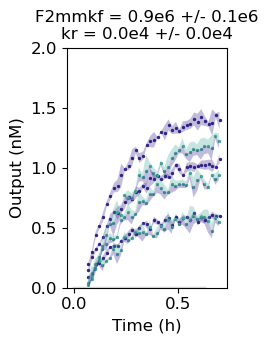

In [5]:
data1 = pd.read_csv("UW_CascadeModel_Natural_Trial1.csv")[0:37]
data2 = pd.read_csv("UW_CascadeModel_Natural_Trial2.csv")[0:37]

RT = 0.593



#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [timeToSec(i) for i in list(data1['Time'].values)]
x2 = [timeToSec(i) for i in list(data2['Time'].values)]


# from calibration curves collected for each reporter during the same experiment
fit1 = [624.49, 1751.13]
fit2 = [294.56, 581.53]


start = timeToSec("0:00:00")
offset1 = 250
offset2 = 240





def getAverageCurve(startTime, offset, level, x, data, conditions, fit):
    """
    Calculate the average curve and standard deviation from data columns based on certain conditions.

    Args:
    - startTime (float): Start time to begin averaging from.
    - offset (float): Offset for the x values.
    - level: Condition level to filter the data columns.
    - x (list): x values for the curve.
    - data (DataFrame): Data containing the curve data in its columns.
    - conditions: Conditions corresponding to each data column.
    - fit (tuple): Tuple containing two fit values.

    Returns:
    - tuple: x values, average y values, and standard deviation of y values.
    """

    y_curves = []

    for i, c in enumerate(data.columns):
        if i >= 2 and lookupCondition(c, conditions) == level:
            ynew = [(float(data[c].values[z]) - fit[0]) / fit[1] for z in range(len(data[c].values)) if float(x[z]) >= startTime]
            y_curves.append(ynew)

    y_avg, y_std = average_and_std(y_curves)
    x_vals = [i + offset - startTime for i in x if i >= startTime]

    return x_vals, y_avg, y_std


conditions = {
    #'F1mmt_100nM: 0.0 nM, F2mm_lowStock: 1.8 nM, R1_S2_500nM: 5.0 nM' : ['J19', 'K19', 'L19'],
'F1mmt_100nM: 0.64 nM, F2mm_lowStock: 1.8 nM, R1_S2_500nM: 5.0 nM' : ['J20', 'K20', 'L20'],
'F1mmt_100nM: 1.06 nM, F2mm_lowStock: 1.8 nM, R1_S2_500nM: 5.0 nM' : ['J21', 'K21', 'L21'],
'F1mmt_100nM: 1.49 nM, F2mm_lowStock: 1.8 nM, R1_S2_500nM: 5.0 nM' : ['J22', 'K22', 'L22'],
#'F1mmt_100nM: 25.5 nM, F2mm_lowStock: 1.8 nM, R1_S2_500nM: 5.0 nM' : ['J23', 'K23', 'L23'],
              }



levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []

for l in levels:
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)

    curves += [[getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[0],getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[1]]]
    stdDev += [getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[2]]

for l in levels:
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)

    curves += [[getAverageCurve(start, offset2, l, x1, data2, conditions, fit2)[0],getAverageCurve(start, offset2, l, x2, data2, conditions, fit2)[1]]]
    stdDev += [getAverageCurve(start, offset2, l, x1, data2, conditions, fit2)[2]]

to_fit = [np.array(c[1])*1e-9 for c in curves]
x_trunc1 = curves[0][0]
x_trunc2 = curves[4][0]




def modelCascade(kf, tArray, fixed_params):

    """
    Function that represents the model to be fit.

    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
    """

    t = tArray
    # Unpack the input parameters
    y0, krep, scale, dG= fixed_params['y0'], fixed_params['krep'], fixed_params['scale'], fixed_params['dG']

    y0 = [i*1e-9 for i in y0]
    scale = 1e-9*scale



    def translatorModel(y, t, kf, dG, krep, scale):
        P, Y1,F1t, F0t, X1, F2, F1, F0, W0, W1, W2 = y
        # CRN:
        # X1 <krev-kf> Y1
        # (X1 + F0 <krev-kf> F0t + W0)
        # (F0t + F1 <krev-kf> F1t + W1)
        # (F1t + F2 <krev-kf> Y1 + W2)
        # Y1 + R1 -kr> P

        kr = float(kf/(math.exp(-dG[1]/RT)))
        #Rate of reporting
        R1 = float(scale - P)
        dPdt = float(krep*(R1)*(Y1))

        #Rate of change of input and output
        dX1dt = float(kr*F0t*W0 - kf*X1*F0)
        dY1dt = float(kf*F1t*F2 - kr*Y1*W2 - dPdt)

        #Rate of change of gate concentrations
        dF1tdt = float(kf*F0t*F1 - kr*F1t*W1 - kf*F1t*F2 + kr*Y1*W2)
        dF0tdt = float(kf*X1*F0 - kr*F0t*W0 - kf*F0t*F1 + kr*F1t*W1)
        dF0dt = float(-kf*X1*F0 + kr*F0t*W0)
        dF1dt = float(-kf*F0t*F1 + kr*F1t*W1)
        dF2dt = float(-kf*F1t*F2 + kr*Y1*W2)

        #Rate of change of waste concentrations
        dW0dt =  float(kf*X1*F0 - kr*W0*F0t)
        dW1dt = float(kf*F0t*F1 - kr*W1*F1t)
        dW2dt = float(kf*F1t*F2 - kr*W2*Y1)

        return (dPdt, dY1dt, dF1tdt, dF0tdt, dX1dt, dF2dt, dF1dt, dF0dt, dW0dt, dW1dt, dW2dt)

    #Solve transalot model based on initial conditions and fit
    y1 = [i[0] for i in odeint(translatorModel, y0, t, args=(kf, dG, krep, scale), rtol = 1e-12, atol = 1e-12)]
    kr = kf/(math.exp(-dG[2]/RT))
    if kf < 0 or kr < 0:
      y1 = [-np.inf for _ in range(len(y1))]
    return y1




def residuals(kf, t, yList, fixed_params_list):
    # Loop through each set of y values and fixed parameters and calculate the residuals
    total_residuals = []
    n=0
    for y, fixed_params in zip(yList, fixed_params_list):
        tfull = np.arange(0, t[n][-1]+(t[n][-1]-t[n][-2]),t[n][-1]-t[n][-2])
        mindex = min([i for i in range(len(tfull)) if tfull[i]>= t[n][0]])
        model_y = modelCascade(kf, tfull, fixed_params)[mindex:] # I need to update this so that the model is calculaed starting from 0 then a fraction of it is fit
        total_residuals.append(y - model_y)
        n += 1

    # Concatenate all the residuals into one array
    return np.concatenate(total_residuals)

def fit_modelCascade(tArray, yList, initial_k, fixed_params_list):
    """
    Function to perform fitting for multiple cascades.

    Parameters:
    - tArray: Array of 'x' values (time values) for the cascades.
    - yList: List of 'y' values for each cascade.
    - initial_k_rep: Initial guess for the reporterRate.
    - fixed_params_list: A list of dictionaries, each containing all other parameters which are kept constant for a particular cascade.

    Returns:
    - k_rep: Fitted reporterRate.
    """
    # Fit the model to the data
    out, sucess = leastsq(residuals, initial_k, args=(tArray, yList, fixed_params_list))

    return out



# Define the 'x' values and 'y' values
tArray = np.linspace(0, 10, 100)
yMatrix = np.random.normal(size=(3, len(tArray)))  # three sets of data

"""
    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
"""
dG = [-9.96,-10.11,-10.19]
scale = 12

f2c1 = 2.0
f2c2 = 2.0


# Initial parameters
y_init0 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    f2c1,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.64,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    f2c1,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.06,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    f2c1,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.49,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    f2c1,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init4 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    f2c2,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init5 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.64,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    f2c2,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init6 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.06,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    f2c2,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init7 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.49,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    f2c2,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

krep = 4.1e5

fixed_params_list = [
    #{'y0': y_init0, 'krep': 4.1e5, 'scale':scale, 'dG' : dG},
    {'y0': y_init1, 'krep': 4.1e5,'scale':scale, 'dG' : dG},
    {'y0': y_init2, 'krep': 4.1e5,  'scale':scale, 'dG' : dG},
    {'y0': y_init3, 'krep': 4.1e5,  'scale':scale, 'dG' : dG},
    #{'y0': y_init4, 'krep': 4.1e5, 'scale':scale, 'dG' : dG},
    {'y0': y_init5, 'krep': 4.1e5,'scale':scale, 'dG' : dG},
    {'y0': y_init6, 'krep': 4.1e5,  'scale':scale, 'dG' : dG},
    {'y0': y_init7, 'krep': 4.1e5,  'scale':scale, 'dG' : dG}

]
initial_k = 2e5

inits = [y_init0, y_init1, y_init2, y_init3,y_init4, y_init5, y_init6, y_init7]
x_list = [x_trunc1, x_trunc1, x_trunc1,x_trunc2, x_trunc2, x_trunc2]

fits = []
for out in range(6):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_modelCascade(x, fitting, initial_k, fixed)
  fits += [res[0]]

fitted_kf = np.average(fits)
error = np.std(fits)
fitted_kr = fitted_kf/(math.exp(-dG[2]/RT))
r_error = error/(math.exp(-dG[2]/RT))


print("Fitted kf:", fitted_kf)
print('Error: ', error)
print("Fitted kr:", fitted_kr)
print('Error: ', r_error)
print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

color_scheme = ['#DDDDDD','#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', '#882255', '#44AA99', '#999933', '#AA4499']

x1 = [t/3600 for t in x1]
x2 = [t/3600 for t in x2]
x_trunc1 = [t/3600 for t in x_trunc1]
x_trunc2 = [t/3600 for t in x_trunc2]
for i in range(0,3):
    ax.plot(x1,[i*1e9 for i in modelCascade(fitted_kf, x1, fixed_params_list[i])], color = color_scheme[0])
    ax.scatter(x_trunc1,curves[i][1], color = color_scheme[2], s=2)
    ax.fill_between(x_trunc1,(np.array(curves[i][1])-np.array(stdDev[i])),np.array(curves[i][1]), color = color_scheme[2], alpha=.3, edgecolor=None)
    ax.fill_between(x_trunc1,curves[i][1],  (np.array(curves[i][1])+np.array(stdDev[i])), color = color_scheme[2], alpha=.3, edgecolor=None)
for i in range(3,6):
    ax.plot(x2,[i*1e9 for i in modelCascade(fitted_kf, x2, fixed_params_list[i])], color = color_scheme[0])
    ax.scatter(x_trunc2,curves[i][1], color = color_scheme[7], s=2)
    ax.fill_between(x_trunc2,(np.array(curves[i][1])-np.array(stdDev[i])),np.array(curves[i][1]), color = color_scheme[2], alpha=.3, edgecolor=None)
    ax.fill_between(x_trunc2,curves[i][1],  (np.array(curves[i][1])+np.array(stdDev[i])), color = color_scheme[7], alpha=.3, edgecolor=None)



ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"F2mmkf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-6,1)}e6\nkr = {round(fitted_kr*1e-4,1)}e4 +/- {round(r_error*1e-4,1)}e4", fontsize=12)

#plt.savefig('F2(mm)Detailed_adj.svg', dpi = 600, transparent=True)
plt.show()


### F1 level

Fitted kf: 1849926.7136722615
Error:  306487.7497324008
Fitted kr: 0.07293057654610235
Error:  0.012082818269016858



/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/293130264.py:136: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kr = float(kf/(math.exp(-dG[1]/RT)))
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/293130264.py:143: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dX1dt = float(kr*F0t*W0 - kf*X1*F0)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/293130264.py:147: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dF1tdt = 

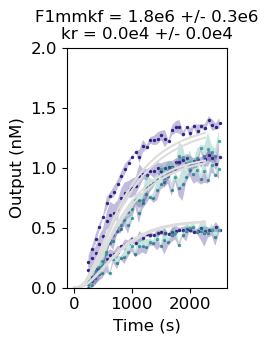

In [6]:
data1 = pd.read_csv("UW_CascadeModel_Natural_Trial1.csv")[0:37]
data2 = pd.read_csv("UW_CascadeModel_Natural_Trial2.csv")[0:37]

RT = 0.593




#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [timeToSec(i) for i in list(data1['Time'].values)]
x2 = [timeToSec(i) for i in list(data2['Time'].values)]


# from calibration curves collected for each reporter during the same experiment
fit1 = [624.49, 1751.13]
fit2 = [294.56, 581.53]


start = timeToSec("0:00:00")
offset1 = 250
offset2 = 240





def getAverageCurve(startTime, offset, level, x, data, conditions, fit):
    """
    Calculate the average curve and standard deviation from data columns based on certain conditions.

    Args:
    - startTime (float): Start time to begin averaging from.
    - offset (float): Offset for the x values.
    - level: Condition level to filter the data columns.
    - x (list): x values for the curve.
    - data (DataFrame): Data containing the curve data in its columns.
    - conditions: Conditions corresponding to each data column.
    - fit (tuple): Tuple containing two fit values.

    Returns:
    - tuple: x values, average y values, and standard deviation of y values.
    """

    y_curves = []

    for i, c in enumerate(data.columns):
        if i >= 2 and lookupCondition(c, conditions) == level:
            ynew = [(float(data[c].values[z]) - fit[0]) / fit[1] for z in range(len(data[c].values)) if float(x[z]) >= startTime]
            y_curves.append(ynew)

    y_avg, y_std = average_and_std(y_curves)
    x_vals = [i + offset - startTime for i in x if i >= startTime]

    return x_vals, y_avg, y_std



conditions = {
    #'F0mmt_100nM: 0.0 nM, F1mm_lowStock: 1.96 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM' : ['M14', 'N14', 'O14'],
'F0mmt_100nM: 0.56 nM, F1mm_lowStock: 1.96 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM' : ['M15', 'N15', 'O15'],
'F0mmt_100nM: 1.11 nM, F1mm_lowStock: 1.96 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM' : ['M16', 'N16', 'O16'],
'F0mmt_100nM: 1.39 nM, F1mm_lowStock: 1.96 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM' : ['M17', 'N17', 'O17'],
#'F0mmt_100nM: 25.25 nM, F1mm_lowStock: 1.96 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM' : ['M18', 'N18', 'O18'],
}



levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for l in levels:
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)

    curves += [[getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[0],getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[1]]]
    stdDev += [getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[2]]

for l in levels:
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)

    curves += [[getAverageCurve(start, offset2, l, x1, data2, conditions, fit2)[0],getAverageCurve(start, offset2, l, x2, data2, conditions, fit2)[1]]]
    stdDev += [getAverageCurve(start, offset2, l, x1, data2, conditions, fit2)[2]]

to_fit = [np.array(c[1])*1e-9 for c in curves]
x_trunc1 = curves[0][0]
x_trunc2 = curves[4][0]



def modelCascade(kf, tArray, fixed_params):

    """
    Function that represents the model to be fit.

    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
    """

    t = tArray
    # Unpack the input parameters
    y0, kf2, kr2, krep, scale, dG = fixed_params['y0'], fixed_params['kf2'],fixed_params['kr2'],fixed_params['krep'], fixed_params['scale'],fixed_params['dG']

    y0 = [i*1e-9 for i in y0]
    scale = 1e-9*scale



    def translatorModel(y, t, kf, kf2, kr2, dG, krep, scale):
        P, Y1,F1t, F0t, X1, F2, F1, F0, W0, W1, W2 = y
        # CRN:
        # X1 <krev-kf> Y1
        # (X1 + F0 <krev-kf> F0t + W0)
        # (F0t + F1 <krev-kf> F1t + W1)
        # (F1t + F2 <krev-kf> Y1 + W2)
        # Y1 + R1 -kr> P
        kr = float(kf/(math.exp(-dG[1]/RT)))

        #Rate of reporting
        R1 = float(scale - P)
        dPdt = float(krep*(R1)*(Y1))

        #Rate of change of input and output
        dX1dt = float(kr*F0t*W0 - kf*X1*F0)
        dY1dt = float(kf2*F1t*F2 - kr2*Y1*W2 - dPdt)

        #Rate of change of gate concentrations
        dF1tdt = float(kf*F0t*F1 - kr*F1t*W1 - kf2*F1t*F2 + kr2*Y1*W2)
        dF0tdt = float(kf*X1*F0 - kr*F0t*W0 - kf*F0t*F1 + kr*F1t*W1)
        dF0dt = float(-kf*X1*F0 + kr*F0t*W0)
        dF1dt = float(-kf*F0t*F1 + kr*F1t*W1)
        dF2dt = float(-kf2*F1t*F2 + kr2*Y1*W2)

        #Rate of change of waste concentrations
        dW0dt =  float(kf*X1*F0 - kr*W0*F0t)
        dW1dt = float(kf*F0t*F1 - kr*W1*F1t)
        dW2dt = float(kf2*F1t*F2 - kr2*W2*Y1)

        return (dPdt, dY1dt, dF1tdt, dF0tdt, dX1dt, dF2dt, dF1dt, dF0dt, dW0dt, dW1dt, dW2dt)

    #Solve transalot model based on initial conditions and fit
    y1 = [i[0] for i in odeint(translatorModel, y0, t, args=(kf,kf2,kr2, dG, krep, scale), rtol = 1e-12, atol = 1e-12)]
    kr = kf/(math.exp(-dG[1]/RT))
    if (kf < 0 or kr < 0):
      return [np.inf]*len(y1)

    return y1




def residuals(kf, t, yList, fixed_params_list):
    # Loop through each set of y values and fixed parameters and calculate the residuals
    total_residuals = []
    n=0
    for y, fixed_params in zip(yList, fixed_params_list):
        tfull = np.arange(0, t[n][-1]+(t[n][-1]-t[n][-2]),t[n][-1]-t[n][-2])
        mindex = min([i for i in range(len(tfull)) if tfull[i]>= t[n][0]])
        model_y = modelCascade(kf, tfull, fixed_params)[mindex:] # I need to update this so that the model is calculaed starting from 0 then a fraction of it is fit
        total_residuals.append(y - model_y)
        n += 1

    # Concatenate all the residuals into one array
    return np.concatenate(total_residuals)
def fit_modelCascade(tArray, yList, initial_k, fixed_params_list):
    """
    Function to perform fitting for multiple cascades.

    Parameters:
    - tArray: Array of 'x' values (time values) for the cascades.
    - yList: List of 'y' values for each cascade.
    - initial_k_rep: Initial guess for the reporterRate.
    - fixed_params_list: A list of dictionaries, each containing all other parameters which are kept constant for a particular cascade.

    Returns:
    - k_rep: Fitted reporterRate.
    """
    # Fit the model to the data
    out, sucess = leastsq(residuals, initial_k, args=(tArray, yList, fixed_params_list))

    return out



# Define the 'x' values and 'y' values
tArray = np.linspace(0, 10, 100)
yMatrix = np.random.normal(size=(3, len(tArray)))  # three sets of data

"""
    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
"""
dG = [-9.96,-10.11,-10.19]
scale = 12

f2c1 = 2.0
f2c2 = 2.0

f1c1 = 2.0
f1c2 = 1.8



# Initial parameters
y_init0 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    f1c1,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.56,  # Initial concentration of F0t (3)
    0,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    f1c1,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    1.11,  # Initial concentration of F0t (3)
    0,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    f1c1,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    1.39,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    f1c1,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init4 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    f1c2,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init5 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.56,  # Initial concentration of F0t (3)
    0,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    f1c2,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init6= [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    1.11,  # Initial concentration of F0t (3)
    0,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    f1c2,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init7 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    1.39,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    f1c2,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]





krep = 4.1e5


kf2 = 899603.9301276058
kr2 = 0.030989672906680577




fixed_params_list = [
    #{'y0': y_init0, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep, 'scale':scale, 'dG' : dG},
    {'y0': y_init1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,'scale':scale, 'dG' : dG},
    {'y0': y_init2,'kf2' : kf2, 'kr2' : kr2, 'krep': krep,  'scale':scale, 'dG' : dG},
    {'y0': y_init3, 'kf2' : kf2, 'kr2' : kr2,'krep': krep,  'scale':scale, 'dG' : dG},
    #{'y0': y_init4, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep, 'scale':scale, 'dG' : dG},
    {'y0': y_init5, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,'scale':scale, 'dG' : dG},
    {'y0': y_init6,'kf2' : kf2, 'kr2' : kr2, 'krep': krep,  'scale':scale, 'dG' : dG},
    {'y0': y_init7, 'kf2' : kf2, 'kr2' : kr2,'krep': krep,  'scale':scale, 'dG' : dG},
]
initial_k = 2e5

inits = [y_init0, y_init1, y_init2, y_init3,y_init4, y_init5, y_init6, y_init7]

x_list  = [x_trunc1,x_trunc1,x_trunc1,x_trunc2,x_trunc2,x_trunc2]

fits = []
for out in range(6):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_modelCascade(x, fitting, initial_k, fixed)
  fits += [res[0]]


fitted_kf = np.average(fits)
error = np.std(fits)
fitted_kr = fitted_kf/(math.exp(-dG[1]/RT))
r_error = error/(math.exp(-dG[1]/RT))


print("Fitted kf:", fitted_kf)
print('Error: ', error)
print("Fitted kr:", fitted_kr)
print('Error: ', r_error)
print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

color_scheme = ['#DDDDDD','#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', '#882255', '#44AA99', '#999933', '#AA4499']


for i in range(0,3):
    ax.plot(x1,[i*1e9 for i in modelCascade(fitted_kf, x1, fixed_params_list[i])], color = color_scheme[0])
    ax.scatter(x_trunc1,curves[i][1], color = color_scheme[2], s=2)
    ax.fill_between(x_trunc1,(np.array(curves[i][1])-np.array(stdDev[i])),np.array(curves[i][1]), color = color_scheme[2], alpha=.3, edgecolor=None)
    ax.fill_between(x_trunc1,curves[i][1],  (np.array(curves[i][1])+np.array(stdDev[i])), color = color_scheme[2], alpha=.3, edgecolor=None)
for i in range(3,6):
    ax.plot(x2,[i*1e9 for i in modelCascade(fitted_kf, x2, fixed_params_list[i])], color = color_scheme[0])
    ax.scatter(x_trunc2,curves[i][1], color = color_scheme[7], s=2)
    ax.fill_between(x_trunc2,(np.array(curves[i][1])-np.array(stdDev[i])),np.array(curves[i][1]), color = color_scheme[2], alpha=.3, edgecolor=None)
    ax.fill_between(x_trunc2,curves[i][1],  (np.array(curves[i][1])+np.array(stdDev[i])), color = color_scheme[7], alpha=.3, edgecolor=None)



ax.set_xlabel('Time (s)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"F1mmkf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-6,1)}e6\nkr = {round(fitted_kr*1e-4,1)}e4 +/- {round(r_error*1e-4,1)}e4", fontsize=12)

#plt.savefig('F1(mm)Detailed.svg', dpi = 600, transparent=True)
plt.show()

### F0 Level

/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/2830532978.py:140: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kr = float(kf/(math.exp(-dG[0]/RT)))
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/2830532978.py:147: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dX1dt = float(kr*F0t*W0 - kf*X1*F0)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/2830532978.py:152: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dF0tdt

Fitted kf: 1386752.8962643922
Error:  155571.98548777102
Fitted kr: 0.07040596734267625
Error:  0.007898448353122475



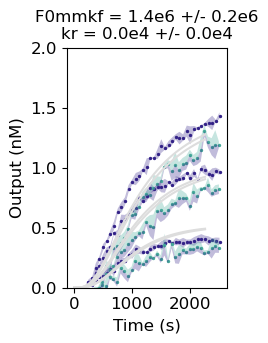

In [7]:
data1 = pd.read_csv("UW_CascadeModel_Natural_Trial1.csv")[0:37]
data2 = pd.read_csv("UW_CascadeModel_Natural_Trial2.csv")[0:37]

RT = 0.593




#Best fit: Fluorescence = 1099.85 * [F2t(nM)] + 322.2
x1 = [timeToSec(i) for i in list(data1['Time'].values)]
x2 = [timeToSec(i) for i in list(data2['Time'].values)]


# from calibration curves collected for each reporter during the same experiment
fit1 = [624.49, 1751.13]
fit2 = [294.56, 581.53]


start = timeToSec("0:00:00")
offset1 = 250
offset2 = 240





def getAverageCurve(startTime, offset, level, x, data, conditions, fit):
    """
    Calculate the average curve and standard deviation from data columns based on certain conditions.

    Args:
    - startTime (float): Start time to begin averaging from.
    - offset (float): Offset for the x values.
    - level: Condition level to filter the data columns.
    - x (list): x values for the curve.
    - data (DataFrame): Data containing the curve data in its columns.
    - conditions: Conditions corresponding to each data column.
    - fit (tuple): Tuple containing two fit values.

    Returns:
    - tuple: x values, average y values, and standard deviation of y values.
    """

    y_curves = []

    for i, c in enumerate(data.columns):
        if i >= 2 and lookupCondition(c, conditions) == level:
            ynew = [(float(data[c].values[z]) - fit[0]) / fit[1] for z in range(len(data[c].values)) if float(x[z]) >= startTime]
            y_curves.append(ynew)

    y_avg, y_std = average_and_std(y_curves)
    x_vals = [i + offset - startTime for i in x if i >= startTime]

    return x_vals, y_avg, y_std



conditions = {
    #'F0(mm)_lowStock: 1.9 nM, F1mm_lowStock: 3.92 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM, X1_100nM: 0.0 nM' : ['M19', 'N19', 'O19'],
'F0(mm)_lowStock: 1.9 nM, F1mm_lowStock: 3.92 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM, X1_100nM: 0.52 nM' : ['M20', 'N20', 'O20'],
'F0(mm)_lowStock: 1.9 nM, F1mm_lowStock: 3.92 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM, X1_100nM: 1.03 nM' : ['M21', 'N21', 'O21'],
'F0(mm)_lowStock: 1.9 nM, F1mm_lowStock: 3.92 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM, X1_100nM: 1.55 nM' : ['M22', 'N22', 'O22'],
#'F0(mm)_lowStock: 1.9 nM, F1mm_lowStock: 3.92 nM, F2mm_lowStock: 3.6 nM, R1_S2_500nM: 5.0 nM, X1_100nM: 25.01 nM' : ['M23', 'N23', 'O23'],
}


levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for l in levels:
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)

    curves += [[getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[0],getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[1]]]
    stdDev += [getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[2]]

for l in levels:
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)

    curves += [[getAverageCurve(start, offset2, l, x1, data2, conditions, fit2)[0],getAverageCurve(start, offset2, l, x2, data2, conditions, fit2)[1]]]
    stdDev += [getAverageCurve(start, offset2, l, x1, data2, conditions, fit2)[2]]

to_fit = [np.array(c[1])*1e-9 for c in curves]
x_trunc1 = curves[0][0]
x_trunc2 = curves[3][0]



from scipy.optimize import leastsq
from scipy.integrate import odeint
import numpy as np


def modelCascade(kf, tArray, fixed_params):

    """
    Function that represents the model to be fit.

    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
    """

    t = tArray
    # Unpack the input parameters
    y0, kf1, kr1, kf2, kr2, krep, scale, dG = fixed_params['y0'], fixed_params['kf1'],fixed_params['kr1'],fixed_params['kf2'],fixed_params['kr2'],fixed_params['krep'], fixed_params['scale'],fixed_params['dG']

    y0 = [i*1e-9 for i in y0]
    scale = 1e-9*scale



    def translatorModel(y, t, kf, kf1, kr1, kf2, kr2, dG, krep, scale):
        P, Y1,F1t, F0t, X1, F2, F1, F0, W0, W1, W2 = y
        # CRN:
        # X1 <krev-kf> Y1
        # (X1 + F0 <krev-kf> F0t + W0)
        # (F0t + F1 <krev-kf> F1t + W1)
        # (F1t + F2 <krev-kf> Y1 + W2)
        # Y1 + R1 -kr> P
        kr = float(kf/(math.exp(-dG[0]/RT)))

        #Rate of reporting
        R1 = float(scale - P)
        dPdt = float(krep*(R1)*(Y1))

        #Rate of change of input and output
        dX1dt = float(kr*F0t*W0 - kf*X1*F0)
        dY1dt = float(kf2*F1t*F2 - kr2*Y1*W2 - dPdt)

        #Rate of change of gate concentrations
        dF1tdt = float(kf1*F0t*F1 - kr1*F1t*W1 - kf2*F1t*F2 + kr2*Y1*W2)
        dF0tdt = float(kf*X1*F0 - kr*F0t*W0 - kf1*F0t*F1 + kr1*F1t*W1)
        dF0dt = float(-kf*X1*F0 + kr*F0t*W0)
        dF1dt = float(-kf1*F0t*F1 + kr1*F1t*W1)
        dF2dt = float(-kf2*F1t*F2 + kr2*Y1*W2)

        #Rate of change of waste concentrations
        dW0dt =  float(kf*X1*F0 - kr*W0*F0t)
        dW1dt = float(kf1*F0t*F1 - kr1*W1*F1t)
        dW2dt = float(kf2*F1t*F2 - kr2*W2*Y1)

        return (dPdt, dY1dt, dF1tdt, dF0tdt, dX1dt, dF2dt, dF1dt, dF0dt, dW0dt, dW1dt, dW2dt)

    #Solve transalot model based on initial conditions and fit
    y1 = [i[0] for i in odeint(translatorModel, y0, t, args=(kf,kf1, kr1, kf2,kr2, dG, krep, scale), rtol = 1e-12, atol = 1e-12)]
    kr = kf/(math.exp(-dG[1]/RT))
    if (kf < 0 or kr < 0):
      return [np.inf]*len(y1)

    return y1




def residuals(kf, t, yList, fixed_params_list):
    # Loop through each set of y values and fixed parameters and calculate the residuals
    total_residuals = []
    n=0
    for y, fixed_params in zip(yList, fixed_params_list):
        tfull = np.arange(0, t[n][-1]+(t[n][-1]-t[n][-2]),t[n][-1]-t[n][-2])
        mindex = min([i for i in range(len(tfull)) if tfull[i]>= t[n][0]])
        model_y = modelCascade(kf, tfull, fixed_params)[mindex:] # I need to update this so that the model is calculaed starting from 0 then a fraction of it is fit
        total_residuals.append(y - model_y)
        n += 1

    # Concatenate all the residuals into one array
    return np.concatenate(total_residuals)
def fit_modelCascade(tArray, yList, initial_k, fixed_params_list):
    """
    Function to perform fitting for multiple cascades.

    Parameters:
    - tArray: Array of 'x' values (time values) for the cascades.
    - yList: List of 'y' values for each cascade.
    - initial_k_rep: Initial guess for the reporterRate.
    - fixed_params_list: A list of dictionaries, each containing all other parameters which are kept constant for a particular cascade.

    Returns:
    - k_rep: Fitted reporterRate.
    """
    # Fit the model to the data
    out, sucess = leastsq(residuals, initial_k, args=(tArray, yList, fixed_params_list))

    return out




import numpy as np

# Define the 'x' values and 'y' values
tArray = np.linspace(0, 10, 100)
yMatrix = np.random.normal(size=(3, len(tArray)))  # three sets of data

"""
    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
"""



dG = [-9.96,-10.11,-10.19]
scale = 12

f2c1 = 2.0
f2c2 = 2.0

f1c1 = 2.0
f1c2 = 1.8

f0c1 = 1.9
f0c2 = 1.8

# Initial parameters
y_init0 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    2*f1c1,  # Initial concentration of F1. (6)
    f0c1,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.52,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    2*f1c1,  # Initial concentration of F1. (6)
    f0c1,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.03,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    2*f1c1,  # Initial concentration of F1. (6)
    f0c1,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.55,  # Initial concentration of X1  (4)
    2*f2c1,  # Initial concentration of F2. (5)
    2*f1c1,  # Initial concentration of F1. (6)
    f0c1,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init4 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    2*f1c2,  # Initial concentration of F1. (6)
    f0c2,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init5 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.52,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    2*f1c2,  # Initial concentration of F1. (6)
    f0c2,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init6 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.03,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    2*f1c2,  # Initial concentration of F1. (6)
    f0c2,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init7 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.55,  # Initial concentration of X1  (4)
    2*f2c2,  # Initial concentration of F2. (5)
    2*f1c2,  # Initial concentration of F1. (6)
    f0c2,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]




krep = 4.1e5


kf2 = 899603.9301276058
kr2 = 0.030989672906680577
kf1 = 1839902.4912862706
kr1 = 0.07253538666499326

fixed_params_list = [
    #{'y0': y_init0, 'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep, 'scale':scale, 'dG' : dG},
    {'y0': y_init1,'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,'scale':scale, 'dG' : dG},
    {'y0': y_init2,'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,  'scale':scale, 'dG' : dG},
    {'y0': y_init3, 'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2,'krep': krep,  'scale':scale, 'dG' : dG},
    #{'y0': y_init4, 'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep, 'scale':scale, 'dG' : dG},
    {'y0': y_init5,'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,'scale':scale, 'dG' : dG},
    {'y0': y_init6,'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2, 'krep': krep,  'scale':scale, 'dG' : dG},
    {'y0': y_init7, 'kf1' : kf1, 'kr1' : kr1, 'kf2' : kf2, 'kr2' : kr2,'krep': krep,  'scale':scale, 'dG' : dG},
]
initial_k = 2e5


x_list  = [x_trunc1,x_trunc1,x_trunc1,x_trunc2,x_trunc2,x_trunc2]

fits = []
for out in range(6):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_modelCascade(x, fitting, initial_k, fixed)
  fits += [res[0]]

fitted_kf = np.average(fits)
error = np.std(fits)
fitted_kr = fitted_kf/(math.exp(-dG[0]/RT))
r_error = error/(math.exp(-dG[0]/RT))


print("Fitted kf:", fitted_kf)
print('Error: ', error)
print("Fitted kr:", fitted_kr)
print('Error: ', r_error)
print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

color_scheme = ['#DDDDDD','#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', '#882255', '#44AA99', '#999933', '#AA4499']


for i in range(0,3):
    ax.plot(x1,[i*1e9 for i in modelCascade(fitted_kf, x1, fixed_params_list[i])], color = color_scheme[0])
    ax.scatter(x_trunc1,curves[i][1], color = color_scheme[2], s=2)
    ax.fill_between(x_trunc1,(np.array(curves[i][1])-np.array(stdDev[i])),np.array(curves[i][1]), color = color_scheme[2], alpha=.3, edgecolor=None)
    ax.fill_between(x_trunc1,curves[i][1],  (np.array(curves[i][1])+np.array(stdDev[i])), color = color_scheme[2], alpha=.3, edgecolor=None)
for i in range(3,6):
    ax.plot(x2,[i*1e9 for i in modelCascade(fitted_kf, x2, fixed_params_list[i])], color = color_scheme[0])
    ax.scatter(x_trunc2,curves[i][1], color = color_scheme[7], s=2)
    ax.fill_between(x_trunc2,(np.array(curves[i][1])-np.array(stdDev[i])),np.array(curves[i][1]), color = color_scheme[2], alpha=.3, edgecolor=None)
    ax.fill_between(x_trunc2,curves[i][1],  (np.array(curves[i][1])+np.array(stdDev[i])), color = color_scheme[7], alpha=.3, edgecolor=None)



ax.set_xlabel('Time (s)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"F0mmkf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-6,1)}e6\nkr = {round(fitted_kr*1e-4,1)}e4 +/- {round(r_error*1e-4,1)}e4", fontsize=12)

#plt.savefig('F0(mm)Detailed.svg', dpi = 600, transparent=True)
plt.show()


# Non-Natural Cascade

## F2 Level

/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/2293306853.py:122: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dX1dt = float(kf*X1*F0)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/2293306853.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dY1dt = float(kf*F1t*F2 - dPdt)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/2293306853.py:126: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dF1tdt = float(kf*F0t*F

Fitted kf: 3181819.4159422927
Error:  114635.38671905002



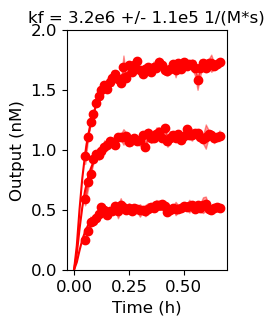

In [8]:
data1 = pd.read_csv("UW_CascadeModel_NN.csv")[0:50]
RT = 0.593

conditions = {
'F1nnt_200nM: 0.5 nM, F2nn_200nM: 2.0 nM, R1nn_1uM: 13.74 nM' : ['E3', 'F3', 'G3'],
'F1nnt_200nM: 1.0 nM, F2nn_200nM: 2.0 nM, R1nn_1uM: 13.74 nM' : ['E4', 'F4', 'G4'],
'F1nnt_200nM: 1.5 nM, F2nn_200nM: 2.0 nM, R1nn_1uM: 13.74 nM' : ['E5', 'F5', 'G5'],
              }

# from calibration curve collected for each reporter during the same experiment
x1 = [timeToSec(i) for i in list(data1['Time'].values)]



fit1 =  [399.89, 1509.54]

start = timeToSec("0:00:00")
offset1 = 180



def getAverageCurve(startTime, offset, level, x, data, conditions, fit):
    """
    Calculate the average curve and standard deviation from data columns based on certain conditions.

    Args:
    - startTime (float): Start time to begin averaging from.
    - offset (float): Offset for the x values.
    - level: Condition level to filter the data columns.
    - x (list): x values for the curve.
    - data (DataFrame): Data containing the curve data in its columns.
    - conditions: Conditions corresponding to each data column.
    - fit (tuple): Tuple containing two fit values.

    Returns:
    - tuple: x values, average y values, and standard deviation of y values.
    """

    y_curves = []

    for i, c in enumerate(data.columns):
        if i >= 2 and lookupCondition(c, conditions) == level:
            ynew = [(float(data[c].values[z]) - fit[0]) / fit[1] for z in range(len(data[c].values)) if float(x[z]) >= startTime]
            y_curves.append(ynew)

    y_avg, y_std = average_and_std(y_curves)
    x_vals = [i + offset - startTime for i in x if i >= startTime]

    return x_vals, y_avg, y_std






levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for l in levels:
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)

    curves += [[getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[0],getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[1]]]
    stdDev += [getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[2]]


to_fit = [np.array(c[1])*1e-9 for c in curves]
x_trunc1 = curves[0][0]

def modelCascade(kf, tArray, fixed_params):

    """
    Function that represents the model to be fit.

    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
    """

    t = tArray
    # Unpack the input parameters
    y0, krep, scale= fixed_params['y0'], fixed_params['krep'], fixed_params['scale']

    y0 = [i*1e-9 for i in y0]
    scale = 1e-9*scale



    def translatorModel(y, t, kf, krep, scale):
        P, Y1,F1t, F0t, X1, F2, F1, F0, W0, W1, W2 = y
        # CRN:
        # X1 <krev-kf> Y1
        # (X1 + F0 <krev-kf> F0t + W0)
        # (F0t + F1 <krev-kf> F1t + W1)
        # (F1t + F2 <krev-kf> Y1 + W2)
        # Y1 + R1 -kr> P

        #Rate of reporting
        R1 = float(scale - P)
        dPdt = float(krep*(R1)*(Y1))

        #Rate of change of input and output
        dX1dt = float(kf*X1*F0)
        dY1dt = float(kf*F1t*F2 - dPdt)

        #Rate of change of gate concentrations
        dF1tdt = float(kf*F0t*F1  - kf*F1t*F2)
        dF0tdt = float(kf*X1*F0 - kf*F0t*F1 )
        dF0dt = float(-kf*X1*F0 )
        dF1dt = float(-kf*F0t*F1)
        dF2dt = float(-kf*F1t*F2 )

        #Rate of change of waste concentrations
        dW0dt =  float(kf*X1*F0)
        dW1dt = float(kf*F0t*F1)
        dW2dt = float(kf*F1t*F2)

        return (dPdt, dY1dt, dF1tdt, dF0tdt, dX1dt, dF2dt, dF1dt, dF0dt, dW0dt, dW1dt, dW2dt)

    #Solve transalot model based on initial conditions and fit
    y1 = [i[0] for i in odeint(translatorModel, y0, t, args=(kf, krep, scale), rtol = 1e-12, atol = 1e-12)]
    if kf < 0:
      y1 = [-np.inf for _ in range(len(y1))]
    return y1




def residuals(kf, t, yList, fixed_params_list):
    # Loop through each set of y values and fixed parameters and calculate the residuals
    total_residuals = []
    n=0
    for y, fixed_params in zip(yList, fixed_params_list):
        tfull = np.arange(0, t[n][-1]+(t[n][-1]-t[n][-2]),t[n][-1]-t[n][-2])
        mindex = min([i for i in range(len(tfull)) if tfull[i]>= t[n][0]])
        model_y = modelCascade(kf, tfull, fixed_params)[mindex:] # I need to update this so that the model is calculaed starting from 0 then a fraction of it is fit
        total_residuals.append(y - model_y)
        n += 1

    # Concatenate all the residuals into one array
    return np.concatenate(total_residuals)

def fit_modelCascade(tArray, yList, initial_k, fixed_params_list):
    """
    Function to perform fitting for multiple cascades.

    Parameters:
    - tArray: Array of 'x' values (time values) for the cascades.
    - yList: List of 'y' values for each cascade.
    - initial_k_rep: Initial guess for the reporterRate.
    - fixed_params_list: A list of dictionaries, each containing all other parameters which are kept constant for a particular cascade.

    Returns:
    - k_rep: Fitted reporterRate.
    """
    # Fit the model to the data
    out, sucess = leastsq(residuals, initial_k, args=(tArray, yList, fixed_params_list))

    return out


# Define the 'x' values and 'y' values
tArray = np.linspace(0, 10, 100)
yMatrix = np.random.normal(size=(3, len(tArray)))  # three sets of data

"""
    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
"""
scale = 17
f2c = 2.6
f1c = 2.4
f0c = 2.6

# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.50,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    f2c,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.1,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    f2c,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    1.7,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    f2c,  # Initial concentration of F2. (5)
    0,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

krep = 1.4e6

fixed_params_list = [
    #{'y0': y_init0, 'krep': 4.1e5, 'scale':scale, 'dG' : dG},
    {'y0': y_init1, 'krep': krep,'scale':scale},
    {'y0': y_init2, 'krep': krep,  'scale':scale},
    {'y0': y_init3, 'krep': krep,  'scale':scale},


]
initial_k = 1e6

x_list = [x_trunc1, x_trunc1, x_trunc1]
fits = []
for out in range(3):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_modelCascade(x, fitting, initial_k, fixed)
  fits += [res[0]]

fitted_kf = np.average(fits)
error = np.std(fits)


print("Fitted kf:", fitted_kf)
print('Error: ', error)

print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


x1_var = [t/3600 for t in x1]
x_trunc1 = [t/3600 for t in x_trunc1]

for i in range(0,3):
    ax.plot(x1_var,[i*1e9 for i in modelCascade(fitted_kf, x1, fixed_params_list[i])], color='red')
    ax.scatter(x_trunc1,curves[i][1], color = 'red')
    ax.fill_between(x_trunc1,(np.array(curves[i][1])-np.array(stdDev[i])),np.array(curves[i][1]),color = 'red', alpha = 0.4)
    ax.fill_between(x_trunc1,curves[i][1],  (np.array(curves[i][1])+np.array(stdDev[i])), color = 'red', alpha = 0.4)


ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"kf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-5,1)}e5 1/(M*s)", fontsize=12)

#plt.savefig('F2NNDetailed.svg', dpi = 600, transparent=True)
plt.show()


## F1 level

/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/4150616262.py:119: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dX1dt = float(- kf*X1*F0)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/4150616262.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dF1tdt = float(kf*F0t*F1 - kf2*F1t*F2)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/4150616262.py:124: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dF0tdt = float

Fitted kf: 13435754.831072638
Error:  1533933.2125680037



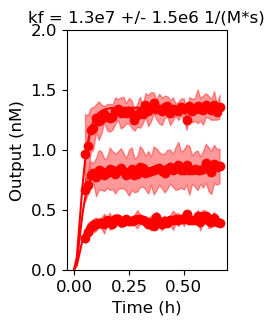

In [9]:
data1 = pd.read_csv("UW_CascadeModel_NN.csv")[0:50]

RT = 0.593

conditions = {
'F0nnt_200nM: 0.5 nM, F1nn_200nM: 2.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM' : ['E8', 'F8', 'G8'],
'F0nnt_200nM: 1.0 nM, F1nn_200nM: 2.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM' : ['E9', 'F9', 'G9'],
'F0nnt_200nM: 1.5 nM, F1nn_200nM: 2.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM' : ['E10', 'F10', 'G10'],
              }

# from calibration curve collected for each reporter during the same experiment
x1 = [timeToSec(i) for i in list(data1['Time'].values)]


fit1 =  [399.89, 1509.54]

start = timeToSec("0:00:00")
offset1 = 180


def getAverageCurve(startTime, offset, level, x, data, conditions, fit):
    """
    Calculate the average curve and standard deviation from data columns based on certain conditions.

    Args:
    - startTime (float): Start time to begin averaging from.
    - offset (float): Offset for the x values.
    - level: Condition level to filter the data columns.
    - x (list): x values for the curve.
    - data (DataFrame): Data containing the curve data in its columns.
    - conditions: Conditions corresponding to each data column.
    - fit (tuple): Tuple containing two fit values.

    Returns:
    - tuple: x values, average y values, and standard deviation of y values.
    """

    y_curves = []

    for i, c in enumerate(data.columns):
        if i >= 2 and lookupCondition(c, conditions) == level:
            ynew = [(float(data[c].values[z]) - fit[0]) / fit[1] for z in range(len(data[c].values)) if float(x[z]) >= startTime]
            y_curves.append(ynew)

    y_avg, y_std = average_and_std(y_curves)
    x_vals = [i + offset - startTime for i in x if i >= startTime]

    return x_vals, y_avg, y_std



levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for l in levels:
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)

    curves += [[getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[0],getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[1]]]
    stdDev += [getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[2]]


to_fit = [np.array(c[1])*1e-9 for c in curves]
x_trunc1 = curves[0][0]

def modelCascade(kf, tArray, fixed_params):

    """
    Function that represents the model to be fit.

    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
    """

    t = tArray
    # Unpack the input parameters
    y0, kf2,  krep, scale = fixed_params['y0'], fixed_params['kf2'],fixed_params['krep'], fixed_params['scale']

    y0 = [i*1e-9 for i in y0]
    scale = 1e-9*scale



    def translatorModel(y, t, kf, kf2, krep, scale):
        P, Y1,F1t, F0t, X1, F2, F1, F0, W0, W1, W2 = y
        # CRN:
        # X1 <krev-kf> Y1
        # (X1 + F0 <krev-kf> F0t + W0)
        # (F0t + F1 <krev-kf> F1t + W1)
        # (F1t + F2 <krev-kf> Y1 + W2)
        # Y1 + R1 -kr> P


        #Rate of reporting
        R1 = float(scale - P)
        dPdt = float(krep*(R1)*(Y1))

        #Rate of change of input and output
        dX1dt = float(- kf*X1*F0)
        dY1dt = float(kf2*F1t*F2 - dPdt)

        #Rate of change of gate concentrations
        dF1tdt = float(kf*F0t*F1 - kf2*F1t*F2)
        dF0tdt = float(kf*X1*F0- kf*F0t*F1)
        dF0dt = float(-kf*X1*F0)
        dF1dt = float(-kf*F0t*F1)
        dF2dt = float(-kf2*F1t*F2)

        #Rate of change of waste concentrations
        dW0dt =  float(kf*X1*F0)
        dW1dt = float(kf*F0t*F1)
        dW2dt = float(kf2*F1t*F2)

        return (dPdt, dY1dt, dF1tdt, dF0tdt, dX1dt, dF2dt, dF1dt, dF0dt, dW0dt, dW1dt, dW2dt)

    #Solve transalot model based on initial conditions and fit
    y1 = [i[0] for i in odeint(translatorModel, y0, t, args=(kf,kf2, krep, scale), rtol = 1e-12, atol = 1e-12)]
    if (kf < 0 ):
      return [np.inf]*len(y1)

    return y1


def residuals(kf, t, yList, fixed_params_list):
    # Loop through each set of y values and fixed parameters and calculate the residuals
    total_residuals = []
    n=0
    for y, fixed_params in zip(yList, fixed_params_list):
        tfull = np.arange(0, t[n][-1]+(t[n][-1]-t[n][-2]),t[n][-1]-t[n][-2])
        mindex = min([i for i in range(len(tfull)) if tfull[i]>= t[n][0]])
        model_y = modelCascade(kf, tfull, fixed_params)[mindex:] # I need to update this so that the model is calculaed starting from 0 then a fraction of it is fit
        total_residuals.append(y - model_y)
        n += 1

    # Concatenate all the residuals into one array
    return np.concatenate(total_residuals)
def fit_modelCascade(tArray, yList, initial_k, fixed_params_list):
    """
    Function to perform fitting for multiple cascades.

    Parameters:
    - tArray: Array of 'x' values (time values) for the cascades.
    - yList: List of 'y' values for each cascade.
    - initial_k_rep: Initial guess for the reporterRate.
    - fixed_params_list: A list of dictionaries, each containing all other parameters which are kept constant for a particular cascade.

    Returns:
    - k_rep: Fitted reporterRate.
    """
    # Fit the model to the data
    out, sucess = leastsq(residuals, initial_k, args=(tArray, yList, fixed_params_list))

    return out

# Define the 'x' values and 'y' values
tArray = np.linspace(0, 10, 100)
yMatrix = np.random.normal(size=(3, len(tArray)))  # three sets of data

"""
    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
"""
scale = 17
f2c = 2.6
f1c = 2.4
f0c = 2.6


# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.42,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    f1c,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
    0.84,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    f1c,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0,  # Initial concentration of F1t (2)
    1.35,  # Initial concentration of F0t (3)
    0.0,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    f1c,  # Initial concentration of F1. (6)
    0.0,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]




krep = 1.4e6
kf2 = 3.2e6

fixed_params_list = [
    {'y0': y_init1, 'kf2' : kf2, 'krep': krep,'scale':scale},
    {'y0': y_init2, 'kf2' : kf2,'krep': krep,  'scale':scale},
    {'y0': y_init3, 'kf2' : kf2,'krep': krep,  'scale':scale},


]
initial_k = 2e6

x_list = [x_trunc1, x_trunc1, x_trunc1]

fits = []
for out in range(3):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_modelCascade(x, fitting, initial_k, fixed)
  fits += [res[0]]

fitted_kf = np.average(fits)
error = np.std(fits)



print("Fitted kf:", fitted_kf)
print('Error: ', error)

print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


x1_var = [t/3600 for t in x1]
x_trunc1 = [t/3600 for t in x_trunc1]
for i in range(0,3):
    ax.plot(x1_var,[i*1e9 for i in modelCascade(fitted_kf, x1, fixed_params_list[i])], color='red')
    ax.scatter(x_trunc1,curves[i][1], color = 'red')
    ax.fill_between(x_trunc1,(np.array(curves[i][1])-np.array(stdDev[i])),np.array(curves[i][1]),color = 'red', alpha = 0.4)
    ax.fill_between(x_trunc1,curves[i][1],  (np.array(curves[i][1])+np.array(stdDev[i])), color = 'red', alpha = 0.4)

ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"kf = {round(fitted_kf*1e-7,1)}e7 +/- {round(error*1e-6,1)}e6 1/(M*s)", fontsize=12)

#plt.savefig('F1(nn)Detailed.svg', dpi = 600, transparent=True)
plt.show()

## F0 Level

Fitted kf: 2740580.574867582
Error:  35571.00505712954



/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/2118155106.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dX1dt = float(- kf*X1*F0)
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/2118155106.py:128: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dF0tdt = float(kf*X1*F0  - kf1*F0t*F1 )
/var/folders/st/ms2z6hjx45q_b_lh489s7vk00000gq/T/ipykernel_39134/2118155106.py:129: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dF0dt = float

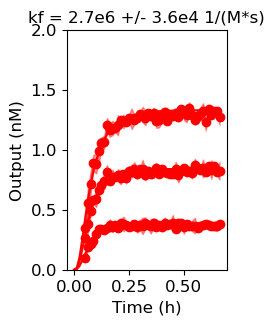

In [10]:
data1 = pd.read_csv("UW_CascadeModel_NN.csv")[0:50]

RT = 0.593


conditions = {
'F0nn_200nM: 2.0 nM, F1nn_200nM: 4.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM, X1nn_200nM: 0.5 nM' : ['E13', 'F13', 'G13'],
'F0nn_200nM: 2.0 nM, F1nn_200nM: 4.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM, X1nn_200nM: 1.0 nM' : ['E14', 'F14', 'G14'],
'F0nn_200nM: 2.0 nM, F1nn_200nM: 4.0 nM, F2nn_200nM: 4.0 nM, R1nn_1uM: 13.74 nM, X1nn_200nM: 1.5 nM' : ['E15', 'F15', 'G15'],
}

x1 = [timeToSec(i) for i in list(data1['Time'].values)]


# from calibration curve collected for each reporter during the same experiment
fit1 =  [399.89, 1509.54]



start = timeToSec("0:00:00")
offset1 = 180


def getAverageCurve(startTime, offset, level, x, data, conditions, fit):
    """
    Calculate the average curve and standard deviation from data columns based on certain conditions.

    Args:
    - startTime (float): Start time to begin averaging from.
    - offset (float): Offset for the x values.
    - level: Condition level to filter the data columns.
    - x (list): x values for the curve.
    - data (DataFrame): Data containing the curve data in its columns.
    - conditions: Conditions corresponding to each data column.
    - fit (tuple): Tuple containing two fit values.

    Returns:
    - tuple: x values, average y values, and standard deviation of y values.
    """

    y_curves = []

    for i, c in enumerate(data.columns):
        if i >= 2 and lookupCondition(c, conditions) == level:
            ynew = [(float(data[c].values[z]) - fit[0]) / fit[1] for z in range(len(data[c].values)) if float(x[z]) >= startTime]
            y_curves.append(ynew)

    y_avg, y_std = average_and_std(y_curves)
    x_vals = [i + offset - startTime for i in x if i >= startTime]

    return x_vals, y_avg, y_std




levels = list(conditions.keys())

format_dict = {'point_size': 10, 'point_opacity': 0.2, 'fill_opacity': 0.4}



curves = []
stdDev = []
for l in levels:
    #plotCalibratedAverages(l, x, ax, data, conditions, fit,  color_dict ,format_dict)

    curves += [[getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[0],getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[1]]]
    stdDev += [getAverageCurve(start, offset1, l, x1, data1, conditions, fit1)[2]]

to_fit = [np.array(c[1])*1e-9 for c in curves]
x_trunc1 = curves[0][0]



def modelCascade(kf, tArray, fixed_params):

    """
    Function that represents the model to be fit.

    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
    """

    t = tArray
    # Unpack the input parameters
    y0, kf1,  kf2, krep, scale = fixed_params['y0'], fixed_params['kf1'],fixed_params['kf2'],fixed_params['krep'], fixed_params['scale']

    y0 = [i*1e-9 for i in y0]
    scale = 1e-9*scale



    def translatorModel(y, t, kf, kf1, kf2, krep, scale):
        P, Y1,F1t, F0t, X1, F2, F1, F0, W0, W1, W2 = y
        # CRN:
        # X1 <krev-kf> Y1
        # (X1 + F0 <krev-kf> F0t + W0)
        # (F0t + F1 <krev-kf> F1t + W1)
        # (F1t + F2 <krev-kf> Y1 + W2)
        # Y1 + R1 -kr> P

        #Rate of reporting
        R1 = float(scale - P)
        dPdt = float(krep*(R1)*(Y1))

        #Rate of change of input and output
        dX1dt = float(- kf*X1*F0)
        dY1dt = float(kf2*F1t*F2 - dPdt)

        #Rate of change of gate concentrations
        dF1tdt = float(kf1*F0t*F1  - kf2*F1t*F2 )
        dF0tdt = float(kf*X1*F0  - kf1*F0t*F1 )
        dF0dt = float(-kf*X1*F0 )
        dF1dt = float(-kf1*F0t*F1 )
        dF2dt = float(-kf2*F1t*F2 )

        #Rate of change of waste concentrations
        dW0dt =  float(kf*X1*F0 )
        dW1dt = float(kf1*F0t*F1 )
        dW2dt = float(kf2*F1t*F2 )

        return (dPdt, dY1dt, dF1tdt, dF0tdt, dX1dt, dF2dt, dF1dt, dF0dt, dW0dt, dW1dt, dW2dt)

    #Solve transalot model based on initial conditions and fit
    y1 = [i[0] for i in odeint(translatorModel, y0, t, args=(kf,kf1, kf2, krep, scale), rtol = 1e-12, atol = 1e-12)]
    if (kf < 0 ):
      return [np.inf]*len(y1)

    return y1




def residuals(kf, t, yList, fixed_params_list):
    # Loop through each set of y values and fixed parameters and calculate the residuals
    total_residuals = []
    n=0
    for y, fixed_params in zip(yList, fixed_params_list):
        tfull = np.arange(0, t[n][-1]+(t[n][-1]-t[n][-2]),t[n][-1]-t[n][-2])
        mindex = min([i for i in range(len(tfull)) if tfull[i]>= t[n][0]])
        model_y = modelCascade(kf, tfull, fixed_params)[mindex:] # I need to update this so that the model is calculaed starting from 0 then a fraction of it is fit
        total_residuals.append(y - model_y)
        n += 1

    # Concatenate all the residuals into one array
    return np.concatenate(total_residuals)
def fit_modelCascade(tArray, yList, initial_k, fixed_params_list):
    """
    Function to perform fitting for multiple cascades.

    Parameters:
    - tArray: Array of 'x' values (time values) for the cascades.
    - yList: List of 'y' values for each cascade.
    - initial_k_rep: Initial guess for the reporterRate.
    - fixed_params_list: A list of dictionaries, each containing all other parameters which are kept constant for a particular cascade.

    Returns:
    - k_rep: Fitted reporterRate.
    """
    # Fit the model to the data
    out, sucess = leastsq(residuals, initial_k, args=(tArray, yList, fixed_params_list))

    return out


# Define the 'x' values and 'y' values
tArray = np.linspace(0, 10, 100)
yMatrix = np.random.normal(size=(3, len(tArray)))  # three sets of data

"""
    Parameters:
    - params: A list of parameters for the model, in the following order:
        [0] y0: Initial conditions for the ODE system. This should be a list of
            initial values for each variable in the ODE system.
        [1] kf: The forward rate constant.
        [2] kr: The reverse rate constant.
        [3] reporterRate: The reporting rate.
        [4] scale: The scaling factor.
    - fixed_params: A dictionary of parameters that should be held constant during
        the fit. Any parameters not included in this dictionary will be fit. The
        possible keys in this dictionary are:
        'y0_fixed_indices': A list of indices in the y0 array that should be held
            constant.
        'y0_fixed_values': A list of values corresponding to the fixed y0 values.
        'kf', 'kr', 'reporterRate', 'scale': The values of these parameters, if they
            should be held constant.
    - tArray: An array of 'x' values (time values) at which the model should be
        evaluated.
"""




scale = 17
f2c = 2.6
f1c = 2.4
f0c = 2.6


# Initial parameters


y_init1 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.37,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    2*f1c,  # Initial concentration of F1. (6)
    f0c,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init2 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    0.84,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    2*f1c,  # Initial concentration of F1. (6)
    f0c,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]

y_init3 = [
    0.0,  # Initial concentration of P   (0)
    0.00,  # Initial concentration of Y1  (1)
    0.0,  # Initial concentration of F1t (2)
    0.0,  # Initial concentration of F0t (3)
    1.33,  # Initial concentration of X1  (4)
    2*f2c,  # Initial concentration of F2. (5)
    2*f1c,  # Initial concentration of F1. (6)
    f0c,  # Initial concentration of F0. (7)
    0.0,  # Initial concentration of W0. (8)
    0.0,  # Initial concentration of W1. (9)
    0.0   # Initial concentration of W2. (10)
]






krep = 1.4e6
kf2 = 3.2e6
kf1 = 1.3e7

fixed_params_list = [
    {'y0': y_init1,'kf1' : kf1,  'kf2' : kf2,  'krep': krep,'scale':scale},
    {'y0': y_init2,'kf1' : kf1,  'kf2' : kf2,  'krep': krep,  'scale':scale},
    {'y0': y_init3, 'kf1' : kf1,  'kf2' : kf2, 'krep': krep,  'scale':scale},

]




x_list  = [x_trunc1,x_trunc1,x_trunc1]

fits = []
for out in range(3):
  inds = list(range(len(fixed_params_list[0:6])))
  inds.remove(out)

  fixed = slc(fixed_params_list[0:6], inds)
  x = slc(x_list[0:6], inds)
  fitting = slc(to_fit[0:6], inds)
  res = fit_modelCascade(x, fitting, initial_k, fixed)
  fits += [res[0]]


fitted_kf = np.average(fits)
error = np.std(fits)



print("Fitted kf:", fitted_kf)
print('Error: ', error)

print()


plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,1, figsize = (2,3))
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
x1_var = [t/3600 for t in x1]
x_trunc1 = [t/3600 for t in x_trunc1]
for i in range(0,3):
    ax.plot(x1_var,[i*1e9 for i in modelCascade(fitted_kf, x1, fixed_params_list[i])], color='red')
    ax.scatter(x_trunc1,curves[i][1], color = 'red')
    ax.fill_between(x_trunc1,(np.array(curves[i][1])-np.array(stdDev[i])),np.array(curves[i][1]),color = 'red', alpha = 0.4)
    ax.fill_between(x_trunc1,curves[i][1],  (np.array(curves[i][1])+np.array(stdDev[i])), color = 'red', alpha = 0.4)


ax.set_xlabel('Time (h)')
ax.set_ylabel('Output (nM)')
ax.set_ylim(0,2.0)

ax.set_title(f"kf = {round(fitted_kf*1e-6,1)}e6 +/- {round(error*1e-4,1)}e4 1/(M*s)", fontsize=12)

#plt.savefig('F0NNDetailed.svg', dpi = 600, transparent=True)
plt.show()
